# Thompson Sampling

In [1]:
# Thompson Sampling for Slot Machines

# Importing the libraries
import numpy as np

# Setting conversion rates and the number of samples
conversionRates = [0.11, 0.04, 0.13, 0.16, 0.02]
N = 10000
d = len(conversionRates)
print (d)

5


In [2]:
# Creating the dataset
X = np.zeros((N, d))
for i in range(N):
    for j in range(d):
        if np.random.rand() < conversionRates[j]:
            X[i][j] = 1
X

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [3]:
# Making arrays to count our losses and wins
nPosReward = np.zeros(d)
nNegReward = np.zeros(d)

In [4]:
# Taking our best slot machine through beta distibution and updating its losses and wins
for i in range(N):
    selected = 0
    maxRandom = 0
    for j in range(d):
        randomBeta = np.random.beta(nPosReward[j] + 1, nNegReward[j] + 1)
        
        if randomBeta > maxRandom:
            maxRandom = randomBeta
            selected = j
    if X[i][selected] == 1:
        nPosReward[selected] += 1
    else:
        nNegReward[selected] += 1


In [5]:
# Showing which slot machine is considered the best
print(nPosReward)
print(nNegReward)        
nSelected = nPosReward + nNegReward 
print(nSelected)

[  10.    0.  121. 1440.    0.]
[ 127.   41.  762. 7459.   40.]
[ 137.   41.  883. 8899.   40.]


In [6]:
for i in range(d):
    print('Machine number ' + str(i + 1) + ' was selected ' + str(nSelected[i]) + ' times')
print('Conclusion: Best machine is machine number ' + str(np.argmax(nSelected) + 1))


Machine number 1 was selected 137.0 times
Machine number 2 was selected 41.0 times
Machine number 3 was selected 883.0 times
Machine number 4 was selected 8899.0 times
Machine number 5 was selected 40.0 times
Conclusion: Best machine is machine number 4


# RL for Sales and Advertising

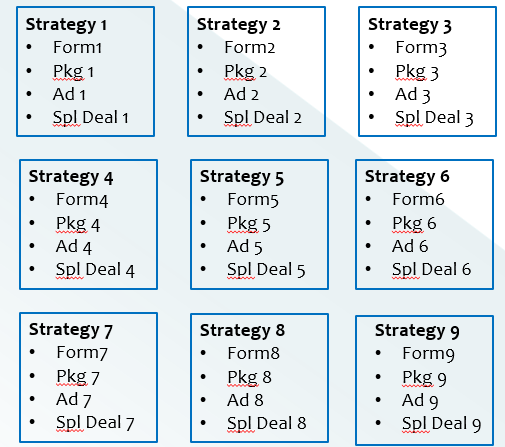

### Simulating the environment

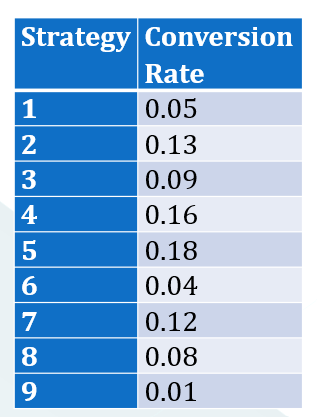

In [7]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import random

# Setting the parameters
N = 10000
d = 9

In [8]:
# Building the environment inside a simulation
conversion_rates = [0.05,0.13,0.09,0.16,0.18,0.04,0.12,0.08,0.01]
X = np.array(np.zeros([N,d]))
for i in range(N):
    for j in range(d):
        if np.random.rand() <= conversion_rates[j]:
            X[i,j] = 1

In [9]:
#print(X) 
rows = X[0:11, :]
print('First 12 rows of the rewards simulation matrix')
print(rows)

First 12 rows of the rewards simulation matrix
[[0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [10]:
# Implementing Random Selection and Thompson Sampling 
strategies_selected_rs = []
strategies_selected_ts = []
total_reward_rs = 0
total_reward_ts = 0
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d

In [11]:
for n in range(0, N):
    # Random Selection
    strategy_rs = random.randrange(d)
    strategies_selected_rs.append(strategy_rs)
    reward_rs = X[n, strategy_rs]
    total_reward_rs = total_reward_rs + reward_rs
    # Thompson Sampling
    strategy_ts = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            strategy_ts = i
    reward_ts = X[n, strategy_ts]
    if reward_ts == 1:
        numbers_of_rewards_1[strategy_ts] = numbers_of_rewards_1[strategy_ts] + 1
    else:
        numbers_of_rewards_0[strategy_ts] = numbers_of_rewards_0[strategy_ts] + 1
    strategies_selected_ts.append(strategy_ts)
    total_reward_ts = total_reward_ts + reward_ts

In [12]:
# Computing the Relative Return
relative_return = (total_reward_ts - total_reward_rs) / total_reward_rs * 100
print("Relative Return: {:.0f} %".format(relative_return))

Relative Return: 71 %


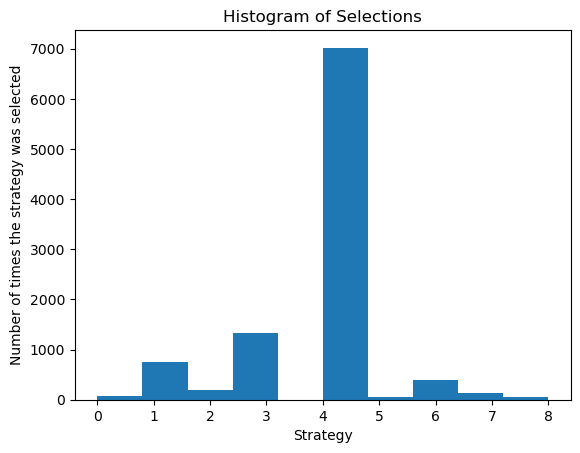

In [13]:
# Plotting the Histogram of Selections
plt.hist(strategies_selected_ts)
plt.title('Histogram of Selections')
plt.xlabel('Strategy')
plt.ylabel('Number of times the strategy was selected')
plt.show()